In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Arguments
# - utility: an np.array where utility[a] is the utility of answer a
# - epsilon > 0: the privacy parameter
# - We can assume the utility is bounded (we can actually test this by looking at its min and max)
# we can re-use this function for any fixed u(., q, x) where only a varies
# Returns
# - a random answer with probability proportional to exp(epsilon u(a, q, x) / 2 sensitivity(u(., q, x))
def exponential_mechanism(utility, epsilon, sensitivity):
    # first, define the probability of every answer.
    probability = np.exp(epsilon * utility / (2 * sensitivity))
    # we want sum_a probability[a] = 1
    probability /= np.sum(probability)
    # we want to sample from this distribution
    # we can use np.random.choice
    return np.random.choice(len(utility), p = probability)

def epsilon_greedy_mechanism(utility, epsilon):
    # this is the wrong implementation!
    if (np.random.uniform()<epsilon):
        return np.argmax(utility)
    else:
        return np.random.choice(len(utility))

In [4]:
def calculate_expected_value(utility, epsilon, n_samples, sensitivity):
    value = 0
    for i in range(n_samples):
        a = exponential_mechanism(utility, epsilon, sensitivity)
        value += utility[a]
    return value / n_samples

[-0.50045967 -0.48005151 -0.45964335 -0.43923518 -0.41882702 -0.39841886
 -0.37801069 -0.35760253 -0.33719437 -0.3167862  -0.29637804 -0.27596988
 -0.25556171 -0.23515355 -0.21474539 -0.19433722 -0.17392906 -0.1535209
 -0.13311273 -0.11270457 -0.09229641 -0.07188824 -0.05148008 -0.03107192
 -0.01066375  0.00974441  0.03015257  0.05056074  0.0709689   0.09137706
  0.11178523  0.13219339  0.15260155  0.17300972  0.19341788  0.21382604
  0.23423421  0.25464237  0.27505053  0.2954587   0.31586686  0.33627502
  0.35668319  0.37709135  0.39749951  0.41790768  0.43831584  0.458724
  0.47913217  0.49954033]
The maximum utility is -0.00974440994461101


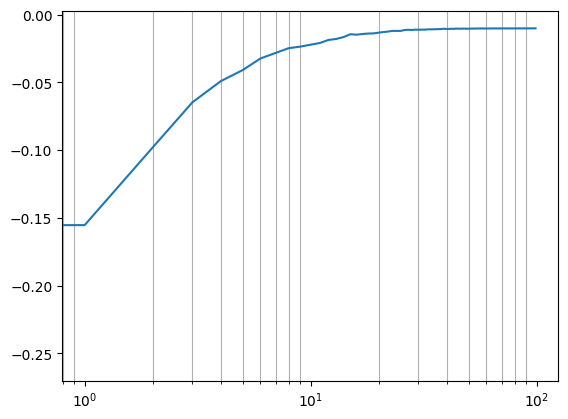

In [5]:
# now we test the exponential mechanism

# create a simple utility vector
population_size = 1000
data = np.random.uniform(size=population_size)
true_mean = np.mean(data)
sensitivity = 1 / population_size
answers = np.linspace(0,1)
print(answers - true_mean)
utility = - np.abs(true_mean - answers)
print("The maximum utility is", np.max(utility))

# values of epsilon to try
epsilon_range  = np.linspace(0,1,100)
n_samples = 1000
exp_utility = [calculate_expected_value(utility, epsilon, n_samples, sensitivity) for epsilon in epsilon_range]

plt.semilogx(exp_utility)
plt.semilogx(np.max(utility))
plt.grid(which='minor')

1.0
Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the ``choice`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if it were ``np.arange(a)``
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement. Default is True,
        meaning that a value of ``a`` can be selecte

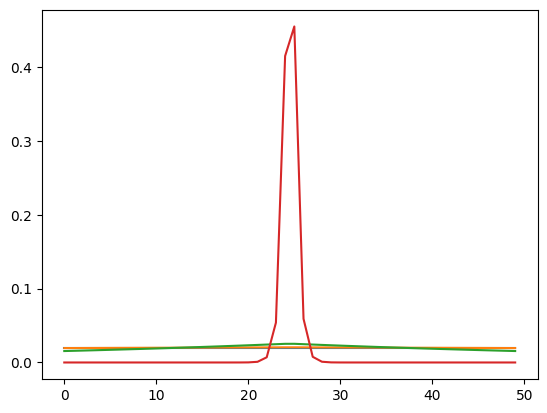

In [7]:
print(sum(np.exp(utility))/sum(np.exp(utility)))
print(help(np.random.choice))
print(np.max(utility) - np.mean(utility))
print(utility)
# Here you can se that as we increase epsilon, the probability of the best answer increases and the worst ones decrease
epsilon = 0;plt.plot(np.exp(epsilon * utility)/ sum(np.exp(epsilon * utility))) # here it is uniform!
epsilon = 0.1;plt.plot(np.exp(epsilon * utility)/ sum(np.exp(epsilon * utility)))
epsilon = 1;plt.plot(np.exp(epsilon * utility)/ sum(np.exp(epsilon * utility)))
epsilon = 100;plt.plot(np.exp(epsilon * utility)/ sum(np.exp(epsilon * utility)))